In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier



# Load the Dataset
data_path = 'alzheimers_disease_data (1) .csv'
data = pd.read_csv(data_path)

for col in data.columns:
    if data[col].dtype == 'number':  # Check for numeric columns
        data[col] = data[col].fillna(data[col].median())  # Use median for missing values
    else:  # Non-numeric columns
        data[col] = data[col].fillna('Unknown')  # Replace with 'Unknown'

print("Processed Data:")
print(data)

# Display the first few rows of the dataset
data.head()

data.tail()

data.describe()

data.columns

# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values (or handle them as needed)
data.dropna(inplace=True)

data.drop(columns=['DoctorInCharge'], inplace=True)
data.drop(columns=['PatientID'], inplace=True)

# --- Data Selection ---
# Selecting independent variables (X) and dependent variable (y)
X = data[['Age', 'BMI', 'SystolicBP', 'CholesterolTotal', 'Diabetes', 'Depression']]
y = data['Diagnosis']  # Dependent variable (0 = No Alzheimer's, 1 = Alzheimer's)
print(X)

# Handle missing values (fill with mean for simplicity)
X = X.fillna(X.mean())
y = y.fillna(y.mode()[0])  # Replace with the mode for categorical variables

from sklearn.preprocessing import StandardScaler
# Standardize the independent variables for better SVM performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



Processed Data:
      PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0          4751   73       0          0               2  22.927749        0   
1          4752   89       0          0               0  26.827681        0   
2          4753   73       0          3               1  17.795882        0   
3          4754   74       1          0               1  33.800817        1   
4          4755   89       0          0               0  20.716974        0   
...         ...  ...     ...        ...             ...        ...      ...   
2144       6895   61       0          0               1  39.121757        0   
2145       6896   75       0          0               2  17.857903        0   
2146       6897   77       0          0               1  15.476479        0   
2147       6898   78       1          3               1  15.299911        0   
2148       6899   72       0          0               2  33.289738        0   

      AlcoholConsumption  PhysicalA

In [2]:
# --- Data Selection ---
# Selecting independent variables (X) for clustering
X = data[['Age', 'BMI', 'SystolicBP', 'CholesterolTotal', 'Diabetes', 'Depression']]  # Features

In [3]:
# Handle missing values by filling with mean
X = X.fillna(X.mean())

In [4]:
# --- Data Preprocessing ---
# Standardize the features (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# --- K-Means Clustering ---
# Initialize the KMeans model with a range of cluster values to try
k_range = range(2, 11)  # Trying clusters from 2 to 10
inertia = []  # Store inertia values (sum of squared distances to the nearest centroid)
silhouette_scores = []  # Store silhouette scores for each k
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)

    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

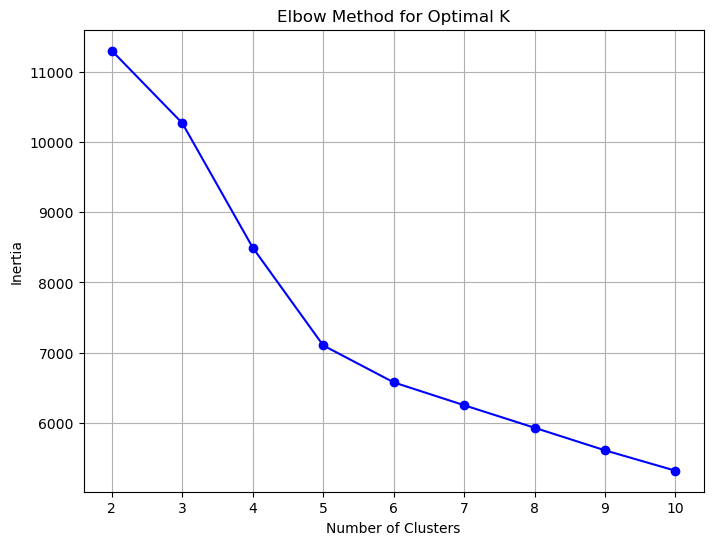

In [7]:
# --- Elbow Method ---
# Plot inertia (Elbow Method) to determine the optimal number of clusters
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

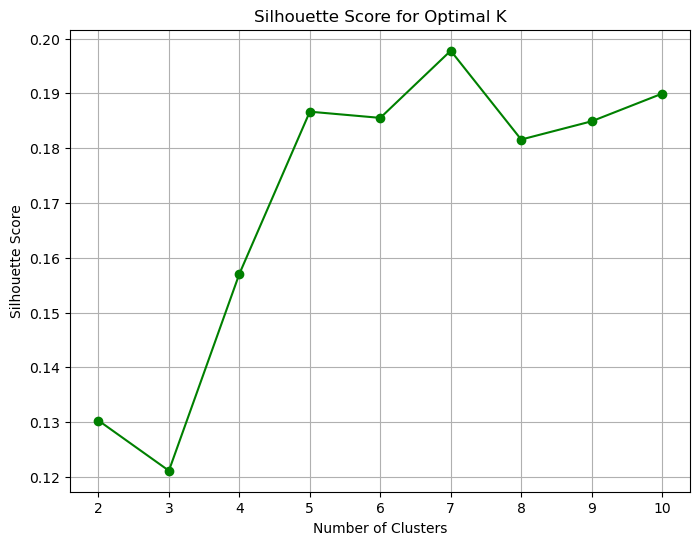

In [8]:
# --- Silhouette Score ---
# Plot silhouette scores to check clustering quality
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o', color='g')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [9]:
# --- Final K-Means Clustering (Optimal K) ---
# Choose the optimal K based on the Elbow and Silhouette methods
optimal_k = 3  # Assume 3 clusters from analysis

In [10]:
# Train the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [12]:
# --- Add Cluster Labels to DataFrame ---
data['Cluster'] = kmeans.labels_

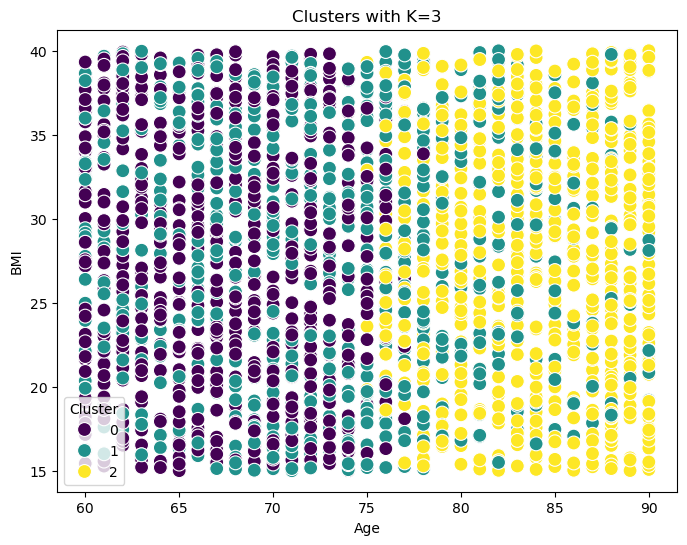

In [14]:
# --- Cluster Analysis ---
# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Age'], y=data['BMI'], hue=data['Cluster'], palette='viridis', s=100)
plt.title(f'Clusters with K={optimal_k}')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Cluster')
plt.show()

In [15]:
# --- Cluster Centers ---
# Get the cluster centers (mean values of features for each cluster)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

In [16]:
# Display cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers, columns=X.columns)
print("Cluster Centers (Feature Means for Each Cluster):")
print(cluster_centers_df)

Cluster Centers (Feature Means for Each Cluster):
         Age        BMI  SystolicBP  CholesterolTotal  Diabetes  Depression
0  67.278261  27.535354  136.024638        255.154661  0.213043    0.202899
1  73.114441  27.898643  130.679837        180.115648  0.081744    0.222071
2  83.987586  27.524268  136.219310        242.328092  0.161379    0.176552
